# Bike Rental

In [1]:
#importing required libraries 
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#import chi2_contigency for Chi square Test
from scipy import stats 

from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set working directory
os.chdir("C:/Users/Hp/Desktop/Project2")

### Data Pre-Processing

In [3]:
# reading data into dataframe
bike_rental= pd.read_csv("day.csv",sep=',')

In [4]:
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
bike_rental.shape

(731, 16)

## Exploratory Data Analysis 

In [7]:
print(type(bike_rental))
print(bike_rental.shape)
print(bike_rental.dtypes)

<class 'pandas.core.frame.DataFrame'>
(731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
print(bike_rental.columns)
print(bike_rental.nunique())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [9]:
#drop redudant variable
#drop instant variable 
bike_rental=bike_rental.drop(['instant'],axis=1)

#drop dteday variable
bike_rental=bike_rental.drop(['dteday'],axis=1)

#drop casual variable
bike_rental=bike_rental.drop(['casual'],axis=1)

#drop registerd variable
bike_rental=bike_rental.drop(['registered'],axis=1)

In [10]:
print(bike_rental.shape)

(731, 12)


In [11]:
#rename variables in data set
bike_rental=bike_rental.rename(columns={'yr':'year','mnth':'month','weathersit':'weather','temp':'temprature','hum':'humidity',
                                        'cnt':'count'})

print(bike_rental.columns)

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temprature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [12]:
#seperate continues and categorical variable
#continues variable
cnames=['temprature','atemp','humidity','windspeed','count']

In [13]:
#categorical variable
cat_cnames = ['season','year','month','holiday','weekday','workingday','weather']

In [14]:
for i in cnames:
     print(bike_rental.loc[:,i].describe())

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temprature, dtype: float64
count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64
count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: humidity, dtype: float64
count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: count, dtype: float64


### Missing Value Analysis

In [15]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(bike_rental.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(bike_rental))*100
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val.to_csv("Miising_perc.csv", index = False)
missing_val

,Variables,Missing_percentage
0,season,0.0
1,year,0.0
2,month,0.0
3,holiday,0.0
4,weekday,0.0
5,workingday,0.0
6,weather,0.0
7,temprature,0.0
8,atemp,0.0
9,humidity,0.0


### we concluded that from the above analysis, there is no missing valued variable in the data set that are given by the clients.

# Outlier Analysis.

In [16]:
# Lets save copy of dataset before preprocessing
df = bike_rental.copy()
bike_rental = df.copy() 

temprature


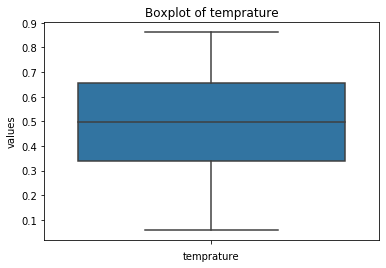

atemp


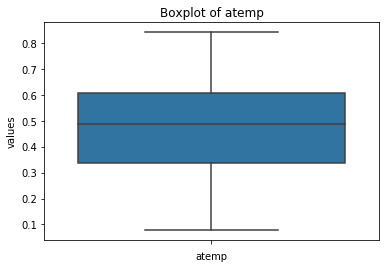

humidity


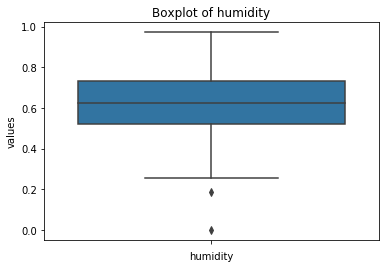

windspeed


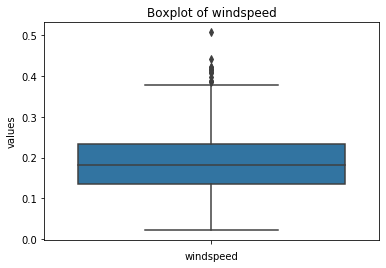

count


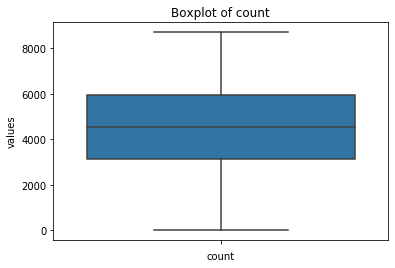

In [17]:
# Lets use boxplot to detect and visulaze the outliers using sns librray 

for i in cnames:
    print(i)
    sns.boxplot(y=bike_rental[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

#### From boxplot we can see inliers in humidity and outliers in windspeed

In [18]:
# Lets cap outliers and inliers with upper fence and lower fence values 
for i in cnames:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(bike_rental[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    LL = q25 - (1.5 * IQR)
    UL = q75 + (1.5 * IQR)
    
    # Capping with ul for maxmimum values 
    # For inliers
    bike_rental.loc[bike_rental[i] < LL ,i] = LL 

   # For ioutliers
    bike_rental.loc[bike_rental[i] > UL ,i] = UL 

temprature
atemp
humidity
windspeed
count


temprature


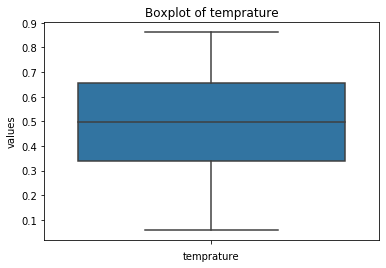

atemp


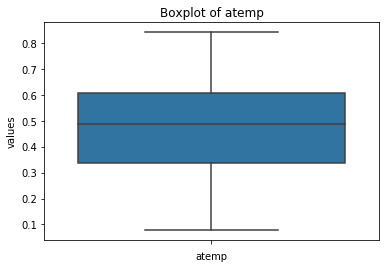

humidity


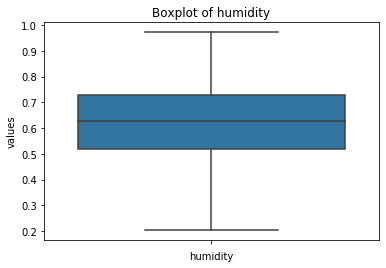

windspeed


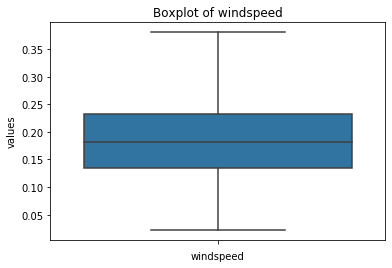

count


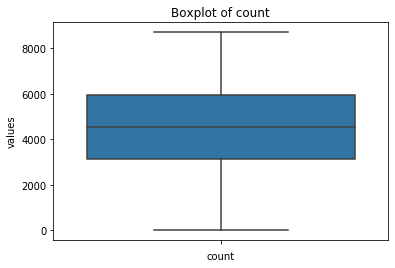

In [19]:
# Lets see our boxplots after removing outliers 

for i in cnames:
    print(i)
    sns.boxplot(y=bike_rental[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

## Visualization
### Univariate Analysis 

Text(0.5, 1.0, 'Distribuation of Temprature')

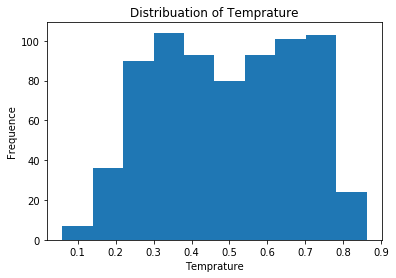

In [20]:
# Histogram for all continuous variables to check  distribution of each variable 
# temperature 
plt.hist(bike_rental['temprature'])
plt.xlabel("Temprature")
plt.ylabel("Frequence")
plt.title('Distribuation of Temprature')


#### normally distributed

Text(0.5, 1.0, 'Distribuation of humidity')

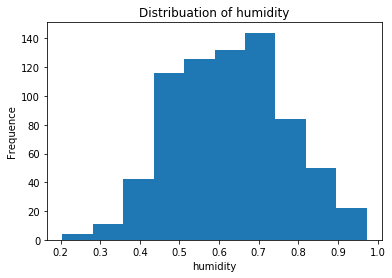

In [21]:
#humidity
plt.hist(bike_rental['humidity'])
plt.xlabel("humidity")
plt.ylabel("Frequence")
plt.title('Distribuation of humidity')

#### Normally distributed

Text(0.5, 1.0, 'Distribuation of windspeed')

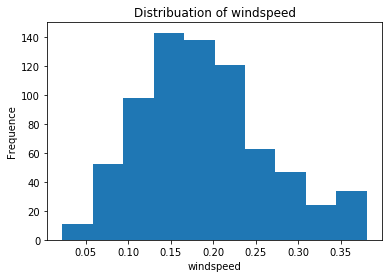

In [22]:
#windspeed
plt.hist(bike_rental['windspeed'])
plt.xlabel("windspeed")
plt.ylabel("Frequence")
plt.title('Distribuation of windspeed')

#### Normally distributed

Text(0.5, 1.0, 'Distribuation of count')

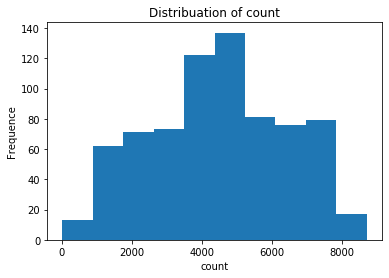

In [23]:
#count
plt.hist(bike_rental['count'])
plt.xlabel("count")
plt.ylabel("Frequence")
plt.title('Distribuation of count')

#### Normally distributed

## Bivariate Analysis

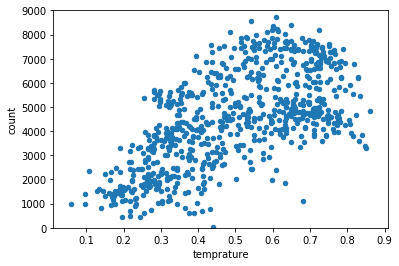

In [24]:
#relation between Numerical Variable 'temp' and target variable 'cnt'
bike_rental['temprature'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables
var = 'temprature'
data = pd.concat([bike_rental['count'], bike_rental[var]], axis=1)
data.plot.scatter(x=var, y='count', ylim=(0,9000));

### as temperature increase Bike rent count also increases

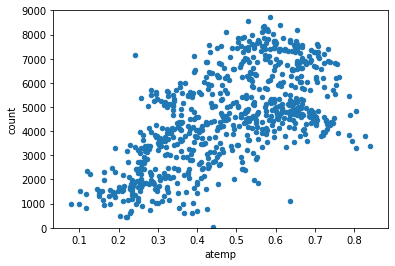

In [25]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'
bike_rental['atemp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables
var = 'atemp'
data = pd.concat([bike_rental['count'], bike_rental[var]], axis=1)
data.plot.scatter(x=var, y='count', ylim=(0,9000));

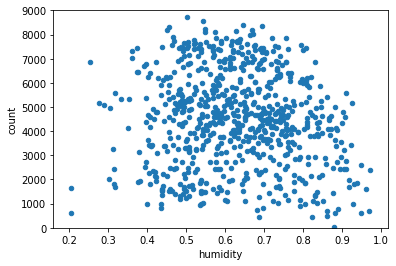

In [26]:
#relation between Numerical Variable 'hum' and target variable 'cnt'
bike_rental['humidity'].value_counts()

#Now draw scatter plot between 'hum' and 'cnt' variables
var = 'humidity'
data = pd.concat([bike_rental['count'], bike_rental[var]], axis=1)
data.plot.scatter(x=var, y='count', ylim=(0,9000));

 ### humidity doesnt have any effect on bikerent count

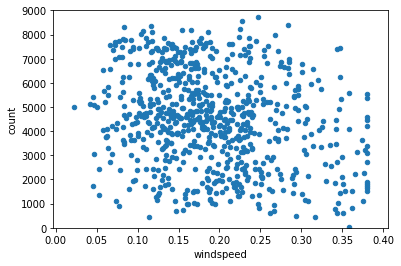

In [27]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'
bike_rental['windspeed'].value_counts()

#Now draw scatter plot between 'windspeed' and 'cnt' variables
var = 'windspeed'
data = pd.concat([bike_rental['count'], bike_rental[var]], axis=1)
data.plot.scatter(x=var, y='count', ylim=(0,9000));

### windspeed doesnt have any effect on bikerent count

### Data Visualization of catagorical variable 

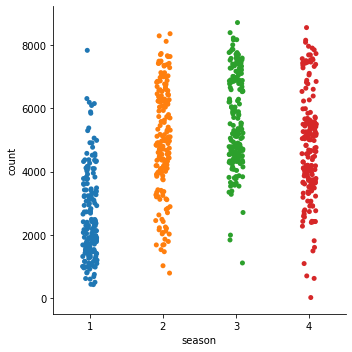

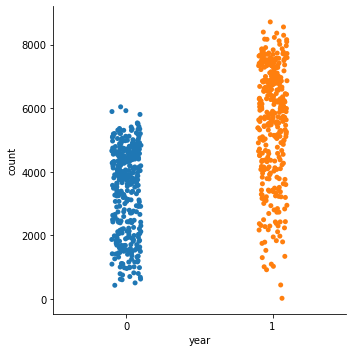

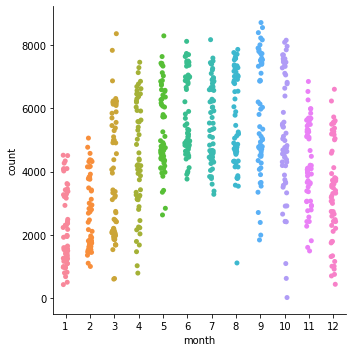

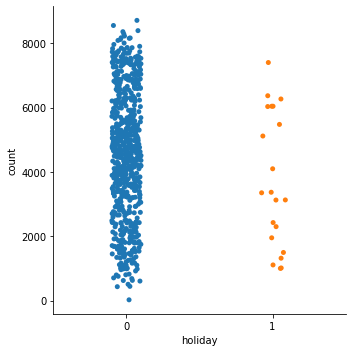

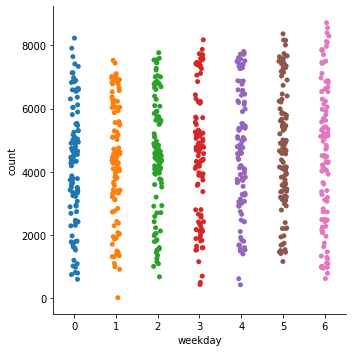

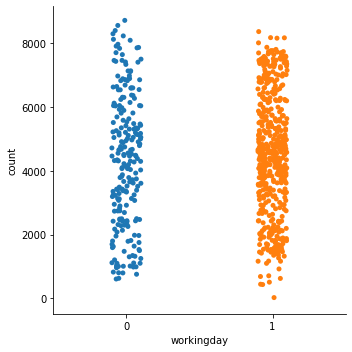

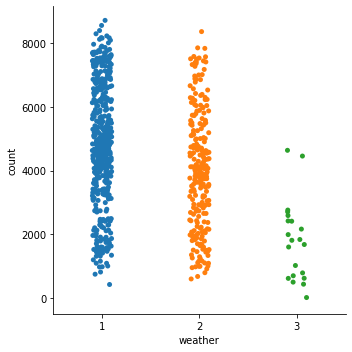

In [28]:
for i in cat_cnames:
    sns.catplot(x=i,y="count",data=bike_rental)
    fname=str(i)+'.pdf'
    plt.savefig(fname)
    
    

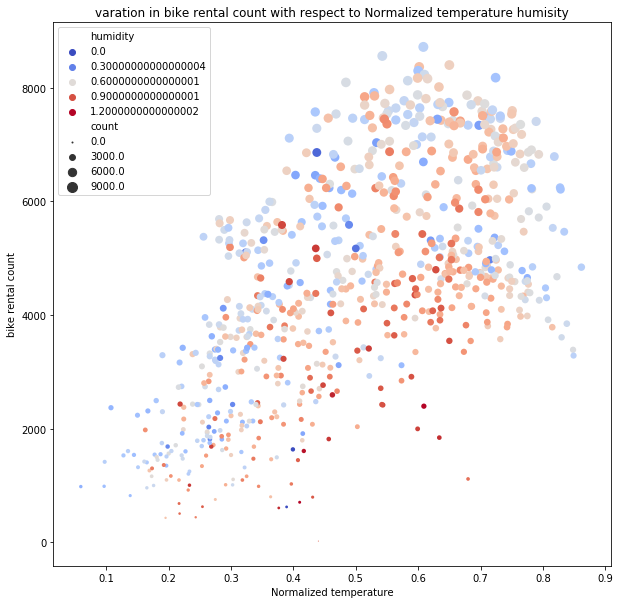

In [29]:
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temprature",y="count",hue="humidity",size="count",palette="coolwarm",sizes=(1,100),linewidth=0,
                data=bike_rental,ax=ax)
plt.title("varation in bike rental count with respect to Normalized temperature humisity")
plt.ylabel("bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig("bike_temp&humidity_plot.pdf")
        

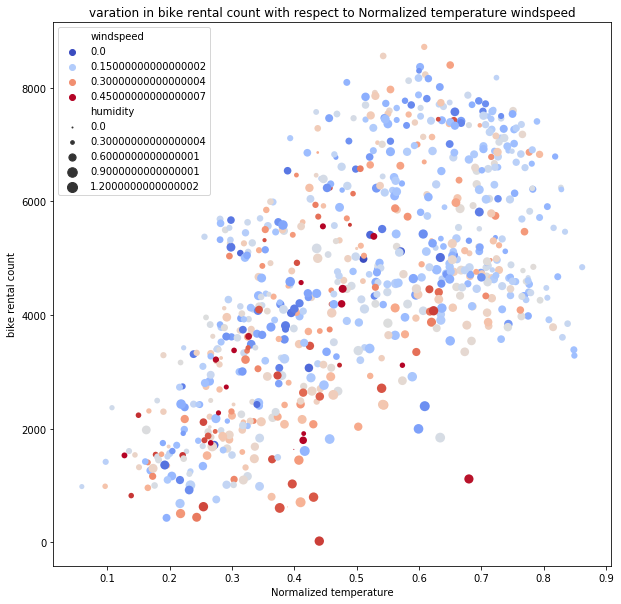

In [30]:
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temprature",y="count",hue="windspeed",size="humidity",palette="coolwarm",sizes=(1,100),linewidth=0,
                data=bike_rental,ax=ax)
plt.title("varation in bike rental count with respect to Normalized temperature windspeed")
plt.ylabel("bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig("bike_temp&windspeed_plot.pdf")
        

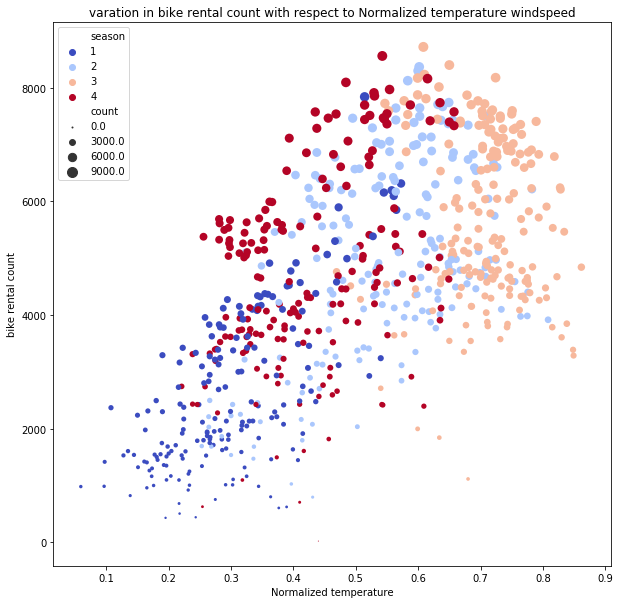

In [31]:
f,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temprature",y="count",hue="season",size="count",palette="coolwarm",sizes=(1,100),linewidth=0,
                data=bike_rental,ax=ax)
plt.title("varation in bike rental count with respect to Normalized temperature windspeed")
plt.ylabel("bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig("bike_temp&windspeed_plot.pdf")

## Feature Engineering

In [32]:
#Converting redpective variables to required data format 
bike_rental['season'] = bike_rental['season'].astype('category')
bike_rental['year'] = bike_rental['year'].astype('category')
bike_rental['month'] = bike_rental['month'].astype('category')
bike_rental['holiday'] = bike_rental['holiday'].astype('category')
bike_rental['weekday'] = bike_rental['weekday'].astype('category')
bike_rental['workingday'] = bike_rental['workingday'].astype('category')
bike_rental['weather'] = bike_rental['weather'].astype('category')

bike_rental['temprature'] = bike_rental['temprature'].astype('float')
bike_rental['atemp'] = bike_rental['atemp'].astype('float')
bike_rental['humidity'] = bike_rental['humidity'].astype('float')
bike_rental['windspeed'] = bike_rental['windspeed'].astype('float')
bike_rental['count'] = bike_rental['count'].astype('float')

## Feature Selection 

In [33]:
# Lets save dataset after outlier analysis 
df =  bike_rental.copy()
bike_rental = df.copy()

             temperature     atemp  humidity  windspeed     count
temperature          NaN       NaN       NaN        NaN       NaN
atemp                NaN  1.000000  0.139924  -0.182948  0.631066
humidity             NaN  0.139924  1.000000  -0.241160 -0.105664
windspeed            NaN -0.182948 -0.241160   1.000000 -0.233657
count                NaN  0.631066 -0.105664  -0.233657  1.000000


Text(0.5, 1, 'Correlation Plot of Continous Variables')

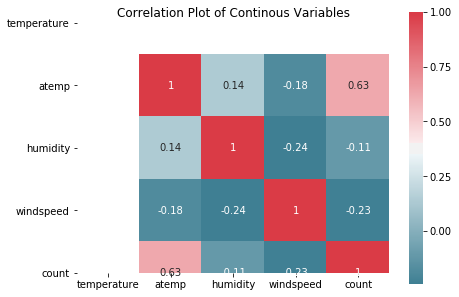

In [34]:
# Correlation analysis
# Using corrplot library we do correlation analysis for numeric variables
# Lets recall numeric variabls and derive correlation matrix and plot

# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Correlation matrix 
# Extract only numeric variables in dataframe for correlation
df_corr= bike_rental.loc[:,cnames]

# Generate correlation matrix
corr_matrix = df_corr.corr()
(print(corr_matrix))

# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Plot using seaborn library
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

plt.title("Correlation Plot of Continous Variables")

### From correlation analysis temp and atemp variables are highly correlated 
### So delete atemp variable 

In [35]:
# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

In [36]:
# Lets find significant categorical variables usig ANOVA test 

# Anova analysis for categorical variable with target numeric variable

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_cnames:
    mod = ols('count' + '~' + i, data = bike_rental).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    9.505959e+08    3.0  128.769622  6.720391e-67
Residual  1.788940e+09  727.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     1.070192e+09   11.0  41.903703  4.251077e-70
Residual  1.669343e+09  719.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.765902e+07    6.0  0.782862  0.583494
Residual  2.721876e+09  724.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

### From the anova result, we can observe working day,weekday and holiday has p value > 0.05, so delete this variable not consider in model.

In [37]:
# droping variables (feature selection)
bike_rental = bike_rental.drop(['atemp', 'holiday','weekday','workingday'], axis=1)

In [38]:
# Lets check dimensions after dimension reduction 
bike_rental.shape

(731, 8)

In [39]:
# Lets check column names after dimension reduction 
bike_rental.columns

Index(['season', 'year', 'month', 'weather', 'temprature', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [40]:
# Lets update  continous and categorical variables after dimension reduction

# Continuous variable
cnames = ['temprature','humidity', 'windspeed', 'count']

# Categorical variables
cat_cnames = ['season', 'year', 'month','weather']

## Feature Scaling

### Since as it is mentioned in data dictionary the values of temp,humidity,windspeed variables are already normalized values so no need to go for feature scaling instead we will visualize the variables to see normality 

temprature


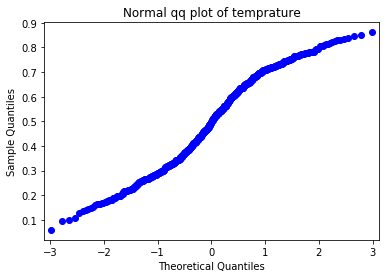

humidity


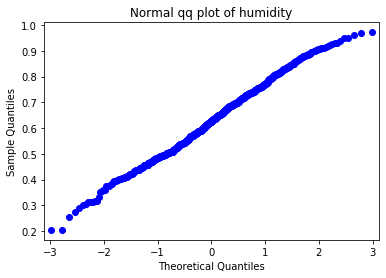

windspeed


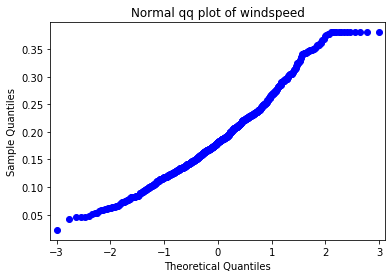

count


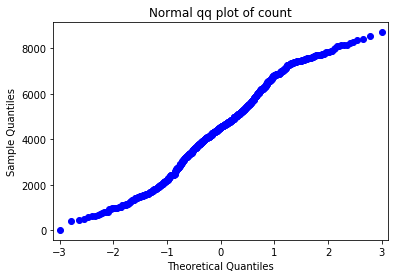

In [41]:
#Normality check
for i in cnames:
    print(i)
    sm.qqplot(bike_rental[i])
    plt.title("Normal qq plot of " +i)
    plt.show()

temprature


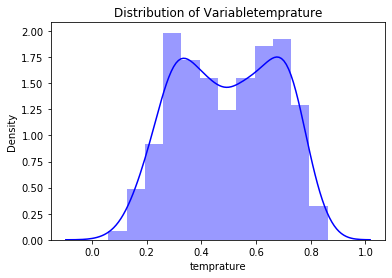

humidity


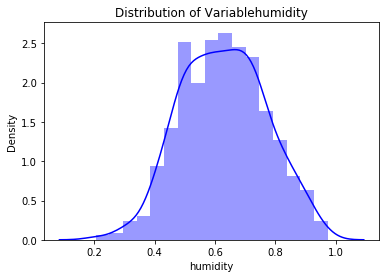

windspeed


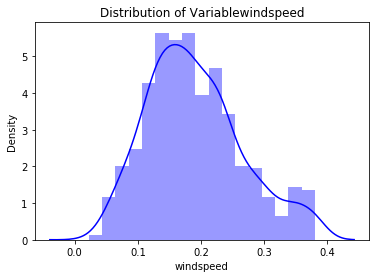

count


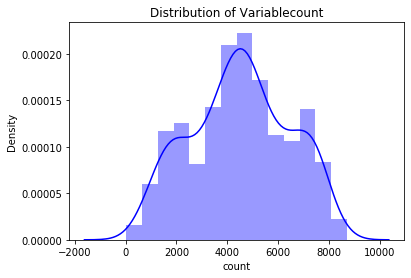

In [42]:
for i in cnames:
    print(i)
    sns.distplot(bike_rental[i],bins='auto',color='blue')
    plt.title("Distribution of Variable"+i)
    plt.ylabel("Density")
    plt.show()

In [43]:
bike_rental.describe()

,temprature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.628197,0.189846,4504.348837
std,0.183051,0.141320,0.075644,1937.211452
min,0.059130,0.204687,0.022392,22.000000
25%,0.337083,0.520000,0.134950,3152.000000
50%,0.498333,0.626667,0.180975,4548.000000
75%,0.655417,0.730209,0.233214,5956.000000
max,0.861667,0.972500,0.380611,8714.000000


### From distribution plot,normal qq plot  and summary  it is clear that data is already normalized.

# Model Development

  ### Now all the required data preprocessing procedure finished. now i'm going to build the model with suitable machine learning algorithm.

### Before going to apply machine learning Algorithm, i'm going to divide the data as test data and train data.

In [44]:
# Load Required libraries for model development 
from sklearn.model_selection import train_test_split #used to split dataset into train and test
from sklearn.metrics import mean_squared_error # used to calculate MSE
from sklearn.metrics import r2_score # used to calculate r square
from sklearn.linear_model import LinearRegression # For linear regression
from sklearn.tree import DecisionTreeRegressor # For Decision Tree
from sklearn.ensemble import RandomForestRegressor # For RandomForest
from sklearn import metrics

#### Lets convert all categorical variables ito dummy variables As we cant pass categorical variables directly in to regression problems

In [45]:
# Lets save our preprocessed data into ML data set 
ML = bike_rental
bike_rental = ML

In [46]:
# Lets call Categorical varaibles after feature selection using ANOVA 
cat_cnames = ['season', 'year', 'month','weather']

In [47]:
#  Create categorical variables to dummy variables-
bike_rental = pd.get_dummies(bike_rental,columns=cat_cnames)


In [48]:
bike_rental.shape

(731, 25)

In [49]:
bike_rental.columns

Index(['temprature', 'humidity', 'windspeed', 'count', 'season_1', 'season_2',
       'season_3', 'season_4', 'year_0', 'year_1', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weather_1', 'weather_2',
       'weather_3'],
      dtype='object')

In [50]:
bike_rental.head()

,temprature,humidity,windspeed,count,season_1,season_2,season_3,season_4,year_0,year_1,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# Split data for predictor and target seperatly
X= bike_rental.drop(['count'],axis=1)
y= bike_rental['count']

In [52]:
# Divide data into train and test sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0)

In [53]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

### The given data set has dependet variable and also independent variable. So as per the data analysis this data set under the supervised data set. So here i am going to use and apply supervised machine learning algorithm. that algorithms are 

### Decision tree regression,

### Random Forest,

### Linear regression,

### Gradient Boosting.


### I am going to check with these machine learning. Based on the accuracy and performence of the algorithm, i will select the suitable machine learning algorithm for this perticular project.

## Desicision Tree regression

In [54]:
#Lets Build decision tree model on train data
# Import libraries
from sklearn.tree import DecisionTreeRegressor

# Decision tree for regression
DT_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [55]:
# Model prediction on train data
DT_train= DT_model.predict(X_train)

# Model prediction on test data
DT_test= DT_model.predict(X_test)

# Model performance on train data
MAPE_train= MAPE(y_train,DT_train)

# Model performance on test data
MAPE_test= MAPE(y_test,DT_test)

# r2 value for train data
r2_train= r2_score(y_train,DT_train)

# r2 value for test data
r2_test=r2_score(y_test,DT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,DT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DT_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=62.26013293672567
Mean Absolute Precentage Error for test data=36.94809301452646
R^2_score for train data=0.6775629218593628
R^2_score for test data=0.6464697716428666
RMSE for train data=1080.3818579492188
RMSE for test data=1226.2196190864843


In [57]:
#applying
predict_DT = DT_model.predict(X_test)

In [58]:
# Model prediction on train data
DT_train= DT_model.predict(X_train)

# Model prediction on test data
DT_test= DT_model.predict(X_test)

In [59]:
# Model performance on train data
MAPE_train= MAPE(y_train,DT_train)

# Model performance on test data
MAPE_test= MAPE(y_test,DT_test)

In [60]:
# r2 value for train data
r2_train= r2_score(y_train,DT_train)

# r2 value for test data
r2_test=r2_score(y_test,DT_test)

In [61]:
# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,DT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DT_test))

In [62]:
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=62.26013293672567
Mean Absolute Precentage Error for test data=36.94809301452646
R^2_score for train data=0.6775629218593628
R^2_score for test data=0.6464697716428666
RMSE for train data=1080.3818579492188
RMSE for test data=1226.2196190864843


In [63]:
Error_metrics_DT= {'Model Name': ['Decision Tree'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
DT_Results = pd.DataFrame(Error_metrics_DT)

In [64]:
DT_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree,62.260133,36.948093,0.677563,0.64647,1080.381858,1226.219619


## Random Forest

In [65]:
# Import libraris
from sklearn.ensemble import RandomForestRegressor

# Random Forest for regression
RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Prediction on train data
RF_train= RF_model.predict(X_train)

# Prediction on test data
RF_test= RF_model.predict(X_test)

# MAPE For train data
MAPE_train= MAPE(y_train,RF_train)

# MAPE For test data
MAPE_test= MAPE(y_test,RF_test)

# Rsquare  For train data
r2_train= r2_score(y_train,RF_train)

# Rsquare  For test data
r2_test=r2_score(y_test,RF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RF_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


Mean Absolute Precentage Error for train data=15.089225676048121
Mean Absolute Precentage Error for test data=20.445454559224128
R^2_score for train data=0.9799248178117209
R^2_score for test data=0.8859707353165975
RMSE for train data=269.5780589631045
RMSE for test data=696.4070282186855


In [66]:
RF_test= RF_model.predict(X_test)

In [67]:
# Lets print results of Randomforest random search
Error_metrics_RF= {'Model Name': ['Random Forest'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RF_Results = pd.DataFrame(Error_metrics_RF)

In [68]:
RF_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Random Forest,15.089226,20.445455,0.979925,0.885971,269.578059,696.407028


## Linear Regression

In [69]:
# Import libraries
import statsmodels.api as sm

# Linear Regression model for regression 
LR_model= sm.OLS(y_train,X_train).fit()
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):          6.64e-207
Time:                        08:35:58   Log-Likelihood:                -4708.1
No. Observations:                 584   AIC:                             9458.
Df Residuals:                     563   BIC:                             9550.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temprature  4858.9463    470.970     10.317      0.0

In [70]:
# Model prediction on  on train data
LR_train= LR_model.predict(X_train)

# Model prediction on test data
LR_test= LR_model.predict(X_test)

# Model performance on train data
MAPE_train= MAPE(y_train,LR_train)

# Model performance on test data
MAPE_test= MAPE(y_test,LR_test)

# r2 value for train data
r2_train= r2_score(y_train,LR_train)

# r2 value for test data-
r2_test=r2_score(y_test,LR_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LR_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LR_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=43.77371916032853
Mean Absolute Precentage Error for test data=19.685303059218505
R^2_score for train data=0.8373616227857162
R^2_score for test data=0.8392613195741977
RMSE for train data=767.3019650844327
RMSE for test data=826.8280143941666


In [71]:
Error_Metrics = {'Model Name': ['Linear Regression'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}

LR_Results = pd.DataFrame(Error_Metrics)

In [72]:
LR_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Linear Regression,43.773719,19.685303,0.837362,0.839261,767.301965,826.828014


## Gradient Boosting

In [78]:
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor

# Lets build a Gradient Boosting model for regression problem
GB_model = GradientBoostingRegressor().fit(X_train, y_train)

# Model prediction on train data
GB_train= GB_model.predict(X_train)

# Model prediction on test data
GB_test= GB_model.predict(X_test)

# Model performance on train data
MAPE_test= MAPE(y_train,GB_train)

# Model performance on test data
MAPE_test= MAPE(y_test,GB_test)

# Rsquare value for train data
r2_train= r2_score(y_train,GB_train)

# Rsquare value for test data
r2_test=r2_score(y_test,GB_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GB_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GB_test))


print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=43.77371916032853
Mean Absolute Precentage Error for test data=18.789018450301338
R^2_score for train data=0.9492901918330808
R^2_score for test data=0.8684147157664097
RMSE for train data=428.4506224460579
RMSE for test data=748.0982606192443


In [79]:
# Lets print the result 
Error_metrics_GB = {'Model Name': ['Gradient Boosting'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GB_results = pd.DataFrame(Error_metrics_GB)

In [80]:
GB_results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Gradient Boosting,43.773719,18.789018,0.94929,0.868415,428.450622,748.098261


In [81]:
Final_Results = pd.concat([DT_Results,RF_Results,LR_Results,GB_results], ignore_index=True, sort =False)

In [82]:
Final_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree,62.260133,36.948093,0.677563,0.646470,1080.381858,1226.219619
1,Random Forest,15.089226,20.445455,0.979925,0.885971,269.578059,696.407028
2,Linear Regression,43.773719,19.685303,0.837362,0.839261,767.301965,826.828014
3,Gradient Boosting,43.773719,18.789018,0.949290,0.868415,428.450622,748.098261


In [75]:
# From above results Random Forest model have optimum values and this algorithm is good for our data 
# Lets save the out put of finalized model (RF)

input = y_test.reset_index()
pred = pd.DataFrame(RF_test,columns = ['pred'])
Final_output = pred.join(input)

In [76]:
Final_output

,pred,index,count
0,5128.49,196,5923.0
1,4632.60,187,4592.0
2,1509.98,14,1248.0
3,1134.30,31,1360.0
4,3251.44,390,4075.0
...,...,...,...
142,5415.97,566,5870.0
143,5434.19,688,5499.0
144,3956.96,266,5423.0
145,7318.83,504,8294.0


In [77]:
Final_output.to_csv("RF_results.csv")

# End Model